In [41]:
!pip install \
   numpy \
   pandas \
   matplotlib \
   seaborn \
   scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [27]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as scalar
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report as cr, confusion_matrix as cm, accuracy_score as acc

In [8]:
data = pd.read_csv('creditcard.csv')
print("dataset:",data.shape)
data.head()

dataset: (271287, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Class
0.0    270805
1.0       481
Name: count, dtype: int64


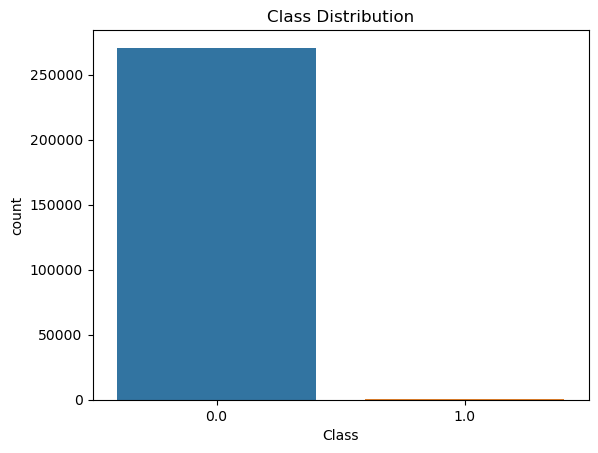

In [9]:
print(df["Class"].value_counts())
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

Class
1.0    481
0.0    481
Name: count, dtype: int64


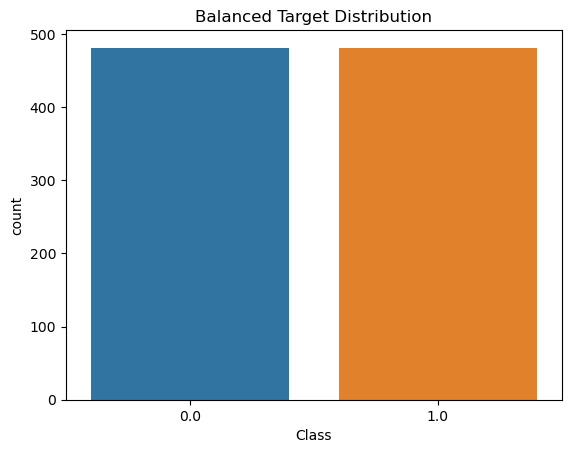

In [13]:
target = "Class"
fraud_cases = data[data['Class'] == 1]
non_fraud_cases = data[data['Class'] == 0].sample(n=len(fraud_cases), random_state=45)
balanced_data = pd.concat([fraud_cases, non_fraud_cases])
print(balanced_data['Class'].value_counts())
sns.countplot(x='Class', data=balanced_data)
plt.title('Balanced Target Distribution')
plt.show()

In [32]:
seed = 42
target = "Class"
features = balanced_data.drop(columns=[target])
labels = balanced_data[target]
scale_cols = ["Time", "Amount"]
std_scalar = scalar()
features[scale_cols] = std_scalar.fit_transform(features[scale_cols])
X_tr, X_te, y_tr, y_te = tts(
    features, labels, test_size=0.2, random_state=seed
)
print("Train shape:", X_tr.shape, "| Test shape:", X_te.shape)
clf = LR()
clf.fit(X_tr, y_tr)
preds = clf.predict(X_te)
print("Accuracy:", acc(y_te, preds))

Train shape: (769, 30) | Test shape: (193, 30)
Accuracy: 0.9585492227979274


In [34]:
model = LR()
model.fit(X_tr, y_tr)


LogisticRegression()

In [40]:
y_pred = model.predict(X_te)
print("Accuracy:", acc(y_te, y_pred))
print("Confusion Matrix:\n", cm(y_te, y_pred))
print("Classification Report:\n", cr(y_te, y_pred))

Accuracy: 0.9585492227979274
Confusion Matrix:
 [[98  1]
 [ 7 87]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        99
         1.0       0.99      0.93      0.96        94

    accuracy                           0.96       193
   macro avg       0.96      0.96      0.96       193
weighted avg       0.96      0.96      0.96       193

